# Nearest Neighbors

In [335]:
import pandas as pd  
import numpy as np  
%matplotlib inline
import matplotlib.pyplot as plt  #For visualization. Matplotlib for basic viz and seaborn for more stylish fi

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import seaborn as seabornInstance 

from sklearn.datasets import load_iris  #import load_iris function from datasets module

from sklearn.neighbors import KNeighborsClassifier  #import sklearn.neighbors to use knn functionalities
from sklearn.metrics import confusion_matrix,classification_report
from matplotlib.colors import ListedColormap

In [336]:
#load iris dataset from sklearn dataset
iris = load_iris()
ir = pd.DataFrame(iris.data)#converting iris array into dataframe
ir.columns = iris.feature_names# assigning iris array feature names to ir dataframe column names
ir['class'] = iris.target #assigning target variable values to class 
#Print the first 5 records
ir.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [337]:
X=iris.data #assigning entire data of iris to X
y=iris.target #assigning target variables to y
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3) #splitting the data into 70% for train and 30% for testing

In [338]:
#converting X_train array into dataframe
X_train=pd.DataFrame(X_train)
X_train.columns=iris.feature_names# assigning iris array feature names to X_train dataframe column names

#converting X_train array into dataframe
X_test=pd.DataFrame(X_test) 
X_test.columns=iris.feature_names #assigning iris array feature names to X_train dataframe column names

In [339]:
X_train=X_train[["sepal length (cm)","sepal width (cm)"]] #selecting two attributes and replacing in same X_train dataset
X_test=X_test[["sepal length (cm)","sepal width (cm)"]] #selecting two attributes and replacing in same X_test dataset

In [340]:
#taking first 2 attributes from iris dataset for training and testing
X = ir.iloc[:, :-3].values
y = ir.iloc[:, 4].values #for y we take class attribute

In [341]:
#creating KNN classifier for n=2
knn=KNeighborsClassifier(n_neighbors=2,metric='euclidean')

knn.fit(X_train,y_train) #train the model using training set
predict=knn.predict(X_test)  #predict the accuracy using test dataset

# Model Accuracy, how often is the classifier correct?
#print("Accuracy when k=2:")
print("Accuracy when k=2:",metrics.accuracy_score(y_test, predict))#printing Accuracy for the model
#Printing confusion matrix
print(confusion_matrix(y_test,predict))

#Printing classification report 
print(classification_report(y_test, predict)) 

Accuracy when k=2: 0.6222222222222222
[[18  1  0]
 [ 0  5  6]
 [ 0 10  5]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.31      0.45      0.37        11
           2       0.45      0.33      0.38        15

    accuracy                           0.62        45
   macro avg       0.59      0.58      0.58        45
weighted avg       0.65      0.62      0.63        45



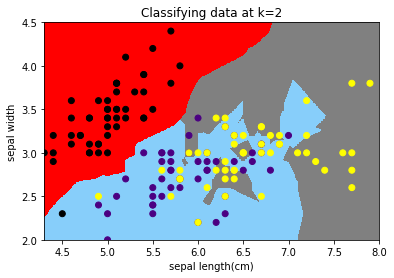

In [342]:
#Plot the decision boundary i.e; min max which are used for limitting
x_min = X[:, 0].min()  #calculate and assign the minimun value of sepal length
x_max = X[:, 0].max()+.1 #calculate and assign the maximum value of sepal length
y_min = X[:, 1].min()  #calculate and assign the minimun value of sepal width
y_max =X[:, 1].max() +.1 #calculate and assign the maximum value of sepal width

#returns coordinate matrices mesh for the decision boundary
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 350),
                        np.linspace(y_min, y_max, 350))
ZZ = knn.predict(np.c_[xx.ravel(), yy.ravel()])

#assigning few colors for background color and observed values
back_color=ListedColormap(["red","lightskyblue","grey"])
obser_color= ListedColormap (["black", "indigo", "yellow"])

ZZ = ZZ.reshape(xx.shape)

plt.figure()
#plotting different colors in 2d 
plt.pcolormesh(xx, yy, ZZ,cmap=back_color)

#assigning scatter plot with sepal length , sepal width and target variable 
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=obser_color)
# plotting the limits of x and y axis
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#displaying the scatter plot
plt.title("Classifying data at k=2")
plt.xlabel("sepal length(cm)")
plt.ylabel("sepal width")
plt.show()

In [343]:
#creating KNN classifier for n=5
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')

knn.fit(X_train,y_train) #train the model using training set
predict=knn.predict(X_test)  #predict the accuracy using test dataset

# Model Accuracy, how often is the classifier correct?
#print("Accuracy when k=5:")
print("Accuracy when k=5:",metrics.accuracy_score(y_test, predict))#printing Accuracy for the model
#Printing confusion matrix
print(confusion_matrix(y_test,predict))

#Printing classification report 
print(classification_report(y_test, predict)) 

Accuracy when k=5: 0.7555555555555555
[[18  1  0]
 [ 0  7  4]
 [ 0  6  9]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.50      0.64      0.56        11
           2       0.69      0.60      0.64        15

    accuracy                           0.76        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.78      0.76      0.76        45



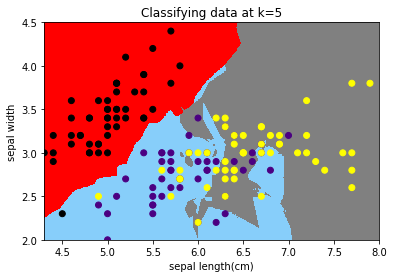

In [344]:
#Plot the decision boundary i.e; min max which are used for limitting
x_min = X[:, 0].min()  #calculate and assign the minimun value of sepal length
x_max = X[:, 0].max()+.1 #calculate and assign the maximum value of sepal length
y_min = X[:, 1].min()  #calculate and assign the minimun value of sepal width
y_max =X[:, 1].max() +.1 #calculate and assign the maximum value of sepal width

#returns coordinate matrices mesh for the decision boundary
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 350),
                        np.linspace(y_min, y_max, 350))
ZZ = knn.predict(np.c_[xx.ravel(), yy.ravel()])

#assigning few colors for background color and observed values
back_color=ListedColormap(["red","lightskyblue","grey"])
obser_color= ListedColormap (["black", "indigo", "yellow"])

ZZ = ZZ.reshape(xx.shape)

plt.figure()
#plotting different colors in 2d 
plt.pcolormesh(xx, yy, ZZ,cmap=back_color)

#assigning scatter plot with sepal length , sepal width and target variable 
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=obser_color)
# plotting the limits of x and y axis
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#displaying the scatter plot
plt.title("Classifying data at k=5")
plt.xlabel("sepal length(cm)")
plt.ylabel("sepal width")
plt.show()

In [345]:
#creating KNN classifier for n=8
knn=KNeighborsClassifier(n_neighbors=8,metric='euclidean')

knn.fit(X_train,y_train) #train the model using training set
predict=knn.predict(X_test)  #predict the accuracy using test dataset

# Model Accuracy, how often is the classifier correct?
#print("Accuracy when k=8:")
print("Accuracy when k=8:",metrics.accuracy_score(y_test, predict))#printing Accuracy for the model
#Printing confusion matrix
print(confusion_matrix(y_test,predict))

#Printing classification report 
print(classification_report(y_test, predict)) 

Accuracy when k=8: 0.8
[[18  1  0]
 [ 0  9  2]
 [ 0  6  9]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.56      0.82      0.67        11
           2       0.82      0.60      0.69        15

    accuracy                           0.80        45
   macro avg       0.79      0.79      0.78        45
weighted avg       0.83      0.80      0.80        45



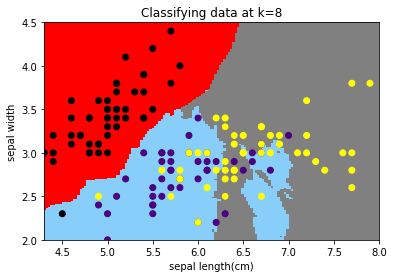

In [346]:
#Plot the decision boundary i.e; min max which are used for limitting
x_min = X[:, 0].min()  #calculate and assign the minimun value of sepal length
x_max = X[:, 0].max()+.1 #calculate and assign the maximum value of sepal length
y_min = X[:, 1].min()  #calculate and assign the minimun value of sepal width
y_max =X[:, 1].max() +.1 #calculate and assign the maximum value of sepal width

#returns coordinate matrices mesh for the decision boundary
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150),
                        np.linspace(y_min, y_max, 150))
ZZ = knn.predict(np.c_[xx.ravel(), yy.ravel()])

#assigning few colors for background color and observed values
back_color=ListedColormap(["red","lightskyblue","grey"])
obser_color= ListedColormap (["black", "indigo", "yellow"])

ZZ = ZZ.reshape(xx.shape)

plt.figure()
#plotting different colors in 2d 
plt.pcolormesh(xx, yy, ZZ,cmap=back_color)

#assigning scatter plot with sepal length , sepal width and target variable 
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=obser_color)
# plotting the limits of x and y axis
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#displaying the scatter plot
plt.title("Classifying data at k=8")
plt.xlabel("sepal length(cm)")
plt.ylabel("sepal width")
plt.show()

Text(0, 0.5, 'Testing Accuracy')

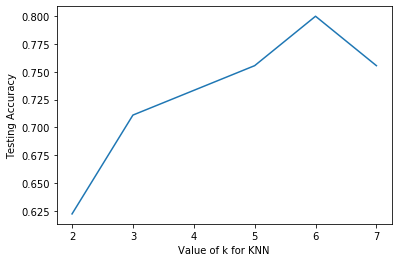

In [347]:
# calculating the accuracies for k values 2,5,8 for plotting graph against the accuracies and k values
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range=range(2,8)#from k value 2 to 8
scores={}
scores_list=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,p=1) #calculating for k values in range and p=1 represents euclidien distance
    knn.fit(X_train,y_train) #`sending training values of x and y into fit function
    y_pred=knn.predict(X_test) #used for making prediction
    scores[k]=metrics.accuracy_score(y_test,y_pred) #calculating accuracy
    scores_list.append(metrics.accuracy_score(y_test,y_pred))  #appending scores to scores_list
 


%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship(2 D graph) between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')